In [ ]:
import pandas as pd
df = pd.read_csv("formated_data3.csv",encoding="ISO-8859-1")
df['event_date']=pd.to_datetime(df["event_date"],infer_datetime_format=True)

In [ ]:
#dropping empty and rows with unknown
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
df = df[df.landslide_trigger != 'unknown']
df = df[df.landslide_setting != 'unknown']
df.drop_duplicates()

,event_date,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,country_code,admin_division_name,admin_division_population,longitude,latitude,temp,humidity,wind
0,2015-05-17 00:00:00,landslide,rain,medium,urban,0,0,MX,Baja California,1173,-117.0898,32.5196,16.4,74.0,13.6
1,2016-10-01 00:00:00,landslide,downpour,medium,bluff,0,0,GB,England,2565,0.8546,51.4216,12.3,88.0,11.3
2,2015-04-02 00:00:00,landslide,continuous_rain,medium,natural_slope,0,0,IN,Kashmir,14965,74.4725,34.1587,5.2,92.0,4.3
3,2015-07-19 00:00:00,landslide,downpour,small,above_road,0,0,US,California,20292,-116.9029,33.0742,21.3,93.0,11.8
4,2015-10-21 00:00:00,landslide,rain,medium,above_road,0,0,MX,Chiapas,19092,-92.2523,15.3482,18.2,92.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,2015-03-05 09:00:00,mudslide,rain,small,above_road,0,0,US,West Virginia,1344,-81.2565,37.7028,-0.9,95.0,14.3
1703,2014-12-02 00:00:00,debris_flow,rain,medium,burned_area,0,0,US,California,3249,-118.9858,34.1946,17.8,73.0,3.3
1704,2016-10-24 23:00:00,rock_fall,construction,medium,mine,0,2,CA,British Columbia,4038,-116.4362,51.4197,3.9,81.0,4.3
1705,2015-11-16 09:00:00,landslide,downpour,medium,natural_slope,0,0,MY,Kuala Lumpur,1453975,101.7036,3.1497,27.4,82.0,3.7


In [ ]:
#splitting date time into columns
df['event_date_year'] = df['event_date'].dt.year
df['event_date_month'] = df['event_date'].dt.month
df['event_date_week'] = df['event_date'].dt.week
df['event_date_day'] = df['event_date'].dt.day
df['event_date_hour'] = df['event_date'].dt.hour
df['event_date_minute'] = df['event_date'].dt.minute
df['event_date_dayofweek'] = df['event_date'].dt.dayofweek
df = df.drop('event_date', axis=1)

<ipython-input-3-534d57747069>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['event_date_week'] = df['event_date'].dt.week


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['country_code']=le.fit_transform(df['country_code'])
df['landslide_category']=le.fit_transform(df['landslide_category'])
df['landslide_trigger']=le.fit_transform(df['landslide_trigger'])
df['landslide_setting']=le.fit_transform(df['landslide_setting'])
df['landslide_size']=le.fit_transform(df['landslide_size'])
df['admin_division_name']=le.fit_transform(df['admin_division_name'])

In [ ]:
X=df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),index=X.index, columns=X.columns)
Y = df['landslide_trigger']
X=X.drop('landslide_trigger',axis=1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures = SelectKBest(score_func=f_regression, k=20)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(20,'Score'))  

                        Specs      Score
10                       temp  34.406099
8                   longitude  33.907959
0          landslide_category  16.053974
13            event_date_year  10.319310
16             event_date_day   5.146348
12                       wind   5.066933
19       event_date_dayofweek   4.772691
2           landslide_setting   3.285908
7   admin_division_population   2.994219
5                country_code   2.893994
18          event_date_minute   1.192861
14           event_date_month   1.174074
17            event_date_hour   0.963765
3              fatality_count   0.928045
9                    latitude   0.748856
1              landslide_size   0.479000
11                   humidity   0.295159
15            event_date_week   0.106722
4                injury_count   0.016458
6         admin_division_name   0.001785


In [ ]:
#X_backup=X
#X=X_backup
#X=X[['temp','longitude','landslide_category','wind','landslide_setting','admin_division_population','country_code','fatality_count','latitude','landslide_size']]
X=X[['temp','longitude','landslide_category','wind','landslide_setting','admin_division_population','country_code','latitude','fatality_count']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
print(X)
print(Y)

          temp  longitude  landslide_category      wind  landslide_setting  \
0    -0.105749  -1.112515           -0.373315  0.533543           2.163858   
1    -0.600428   0.083097           -0.373315  0.241966          -0.095070   
2    -1.457067   0.829368           -0.373315 -0.645444           1.316760   
3     0.485453  -1.110620           -0.373315  0.305352          -0.659803   
4     0.111427  -0.860735           -0.373315 -0.734185          -0.659803   
...        ...        ...                 ...       ...                ...   
1702 -2.193052  -0.749270            0.229925  0.622284          -0.659803   
1703  0.063166  -1.131735           -2.183032 -0.772217           0.187296   
1704 -1.613916  -1.105889            2.039642 -0.645444           1.034394   
1705  1.221439   1.105412           -0.373315 -0.721508           1.316760   
1706 -1.843158   0.757470           -0.373315 -0.303158           1.034394   

      admin_division_population  country_code  latitude  fatali

In [ ]:
import statistics
import random
from sklearn.metrics import accuracy_score
from sklearn .dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

RandomModel=DummyClassifier(strategy="uniform")
RandomModel.fit(X,Y)
y_pred=RandomModel.predict(X)
print("Accuracy score:",accuracy_score(Y, y_pred))

MostFrequentModel=DummyClassifier(strategy="most_frequent")
MostFrequentModel.fit(X,Y)
y_pred=MostFrequentModel.predict(X)
print("Accuracy score:",accuracy_score(Y, y_pred))

KNNModel=KNeighborsClassifier(n_neighbors=13,weights='uniform')
KNNModel.fit(X_train,Y_train)
y_pred=KNNModel.predict(X_test)
print("Accuracy score:",accuracy_score(Y_test, y_pred))

Accuracy score: 0.05868405453467694
Accuracy score: 0.3633669235328986
Accuracy score: 0.47041420118343197


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod

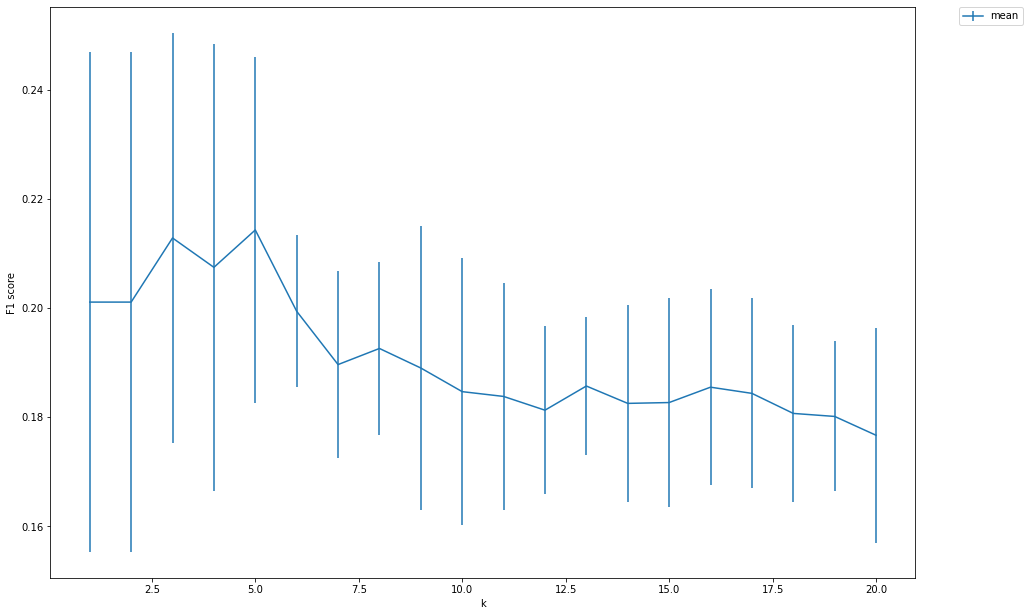

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

k_values=range(1,21)
mean_f1=[]
std_f1=[]
for i in k_values:
  #creating the model and plotting predictions
  KNNModel=KNeighborsClassifier(n_neighbors=i,weights='distance')
  KNNModel.fit(X,Y)
  f1_scores = cross_val_score(KNNModel, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
  mean_f1.append(np.array(f1_scores).mean())
  std_f1.append(np.array(f1_scores).std())

#plotting cross validation
fig=plt.figure()
fig.set_size_inches(15.5, 10.5)
ax=fig.add_subplot(111)
ax.errorbar(k_values,mean_f1,label='mean',yerr=std_f1)
ax.set_ylabel("F1 score")
ax.set_xlabel("k")
ax.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod

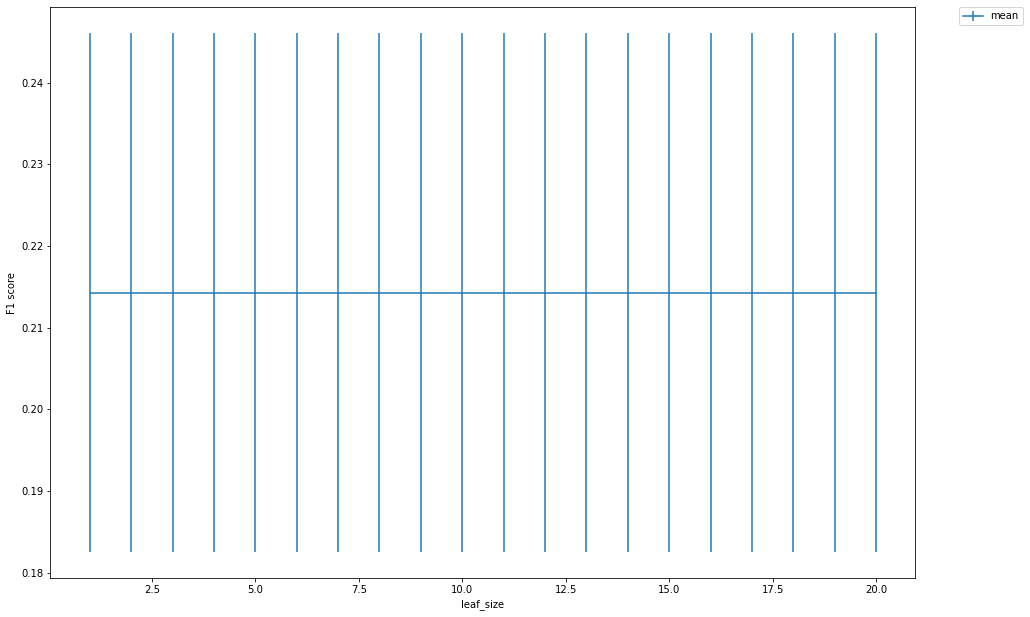

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

leaf_size=range(1,21)
mean_f1=[]
std_f1=[]
for i in leaf_size:
  #creating the model and plotting predictions
  KNNModel=KNeighborsClassifier(n_neighbors=5,leaf_size=i,weights='distance')
  KNNModel.fit(X_train,Y_train)
  f1_scores = cross_val_score(KNNModel, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
  mean_f1.append(np.array(f1_scores).mean())
  std_f1.append(np.array(f1_scores).std())

#plotting cross validation
fig=plt.figure()
fig.set_size_inches(15.5, 10.5)
ax=fig.add_subplot(111)
ax.errorbar(leaf_size,mean_f1,label='mean',yerr=std_f1)
ax.set_ylabel("F1 score")
ax.set_xlabel("leaf_size")
ax.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

In [ ]:
KNNModel=KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(X_train,Y_train)

KNeighborsClassifier()

Accuracy score: 0.5618977020014826
Precision Score :  0.5604825672570571
Recall Score : 0.5618977020014826
F1 Score : 0.5484599148445902
[[  3   3   0  10   0   0   1   1   0   0   0   7   0   1   0]
 [  1 147   0  48   0   1   0   1   2   0   0  23   1   4   0]
 [  0   1   1   3   0   0   0   0   0   0   0   1   0   0   0]
 [  2  78   0 322   5   1   0   0   1   0   0  57   2   2   0]
 [  1   1   0  10  18   0   0   0   0   0   0   4   3   0   0]
 [  1   2   0  14   0   3   0   0   1   0   0   5   0   1   0]
 [  2   0   0   3   0   0   6   0   0   0   0   2   1   0   0]
 [  1   5   0  10   0   0   0  14   1   0   0   2   0   1   0]
 [  2   8   0   9   1   0   0   0   9   0   0   1   0   1   0]
 [  1   1   0   8   0   0   0   0   0   0   0   4   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   1   0   0   0]
 [  2  39   0 107   3   1   4   0   2   0   1 205   4   1   0]
 [  1   4   0   8   0   0   1   0   0   0   0  17   9   0   0]
 [  0   7   0  10   0   0   0   0   3   0   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 

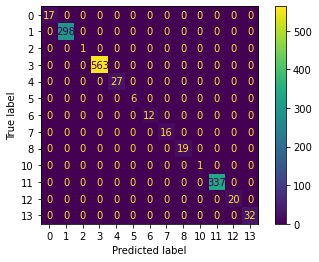

In [ ]:
from sklearn.metrics import plot_confusion_matrix
y_pred=KNNModel.predict(X_train)
print("Accuracy score:",metrics.accuracy_score(Y_train, y_pred))
print("Precision Score : ",metrics.precision_score(Y_train,y_pred,pos_label='positive',average='weighted'))
print("Recall Score :" , metrics.recall_score(Y_train, y_pred, pos_label='positive',average='weighted') )
print("F1 Score :" , metrics.f1_score(Y_train, y_pred, pos_label='positive',average='weighted') )

print(metrics.confusion_matrix(Y_train,y_pred))
plot_confusion_matrix(KNNModel, X_train, y_pred)  
plt.show()

Accuracy score: 0.4467455621301775
Precision Score :  0.4379068047337278
Recall Score : 0.4467455621301775
F1 Score : 0.4369617912742503
[[ 1  3  0  1  0  0  0  0  0  0  0  0  0]
 [ 0 21  0 15  0  0  0  0  2  0 11  0  2]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 33  0 86  1  1  0  1  0  0 17  1  2]
 [ 0  2  0  2  1  0  0  0  0  0  1  1  0]
 [ 0  1  0  1  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  2  0  0  0  0  0  1  0  0  5  0  0]
 [ 0  4  0  2  0  0  0  0  0  0  1  0  1]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 1 11  0 29  0  2  0  0  1  0 39  1  2]
 [ 1  0  0  2  1  0  0  1  0  0  4  1  0]
 [ 1  2  0  2  0  0  0  0  0  0  3  0  1]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 

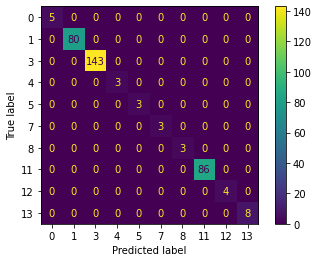

In [ ]:

y_pred=KNNModel.predict(X_test)
print("Accuracy score:",metrics.accuracy_score(Y_test, y_pred))
print("Precision Score : ",metrics.precision_score(Y_test,y_pred,pos_label='positive',average='weighted'))
print("Recall Score :" , metrics.recall_score(Y_test, y_pred, pos_label='positive',average='weighted') )
print("F1 Score :" , metrics.f1_score(Y_test, y_pred, pos_label='positive',average='weighted') )

print(metrics.confusion_matrix(Y_test,y_pred))
plot_confusion_matrix(KNNModel, X_test, y_pred)  
plt.show()